In [1]:
import matplotlib.pyplot as plt
import numpy as np

from environments.SimplePlantSimulator import TOD_action

In [2]:
env = TOD_action(reward_label="daily_percent")
print(env.total_data_steps)
print(env.steps_per_day, env.steps_per_night)
terminal_step = 72 * 20

816
68 76


#### Test different lighting policies

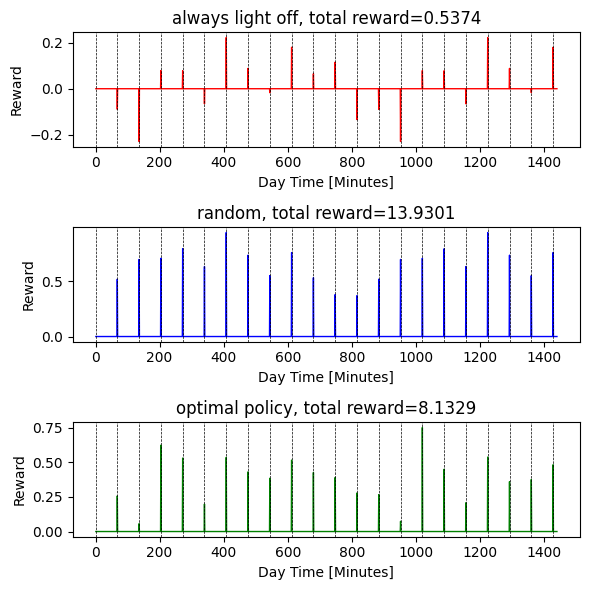

In [3]:
COLORS = ["r", "b", "g"]
LABELS = ["always light off", "random", "optimal policy"]
fig, ax = plt.subplots(3, 1, figsize=(6, 6))

policy1 = np.zeros(terminal_step)
policy3 = np.random.choice([0, 1], terminal_step)
# policy3 = np.tile(np.hstack([np.ones(12), 2*np.ones(48), np.ones(12)]), env.last_day)
policy2 = np.ones(terminal_step)
policy = [policy1, policy2, policy3]

for i in range(3):
    R = []
    AA = []
    State = []
    pol = policy[i]

    env.start()
    for _ in range(terminal_step):
        reward, next_state, done, info = env.step(int(pol[_]))
        R.append(reward)
        AA.append(np.mean(env.observed_areas[-1]))
        State.append(env.current_state)
        if done:
            env.start()

    R = np.array(R)
    ax[i].plot(np.arange(1, len(R) + 1), R, linewidth=1, color=COLORS[i])
    # ax[i].plot(np.arange(1, len(R)+1)*env.interval/60, np.ones(len(R))*np.mean(R[R!=0]), color=COLORS[i], linewidth=1)
    ax[i].set_title(f"{LABELS[i]}, total reward={np.sum(R):.4f}")
    ax[i].set_xlabel("Day Time [Minutes]")
    ax[i].set_ylabel("Reward")
    # ax[i].set_ylim(-0.5, 1.5)

for i in range(int(len(R) / env.steps_per_day) + 1):
    ax[0].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
    ax[1].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
    ax[2].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

fig.tight_layout()

[1.         0.47368419 0.66789669 0.7644664  0.57778811 0.66789669
 0.53987432 0.44508183 0.53566897 0.45342559 0.3873468  0.47272563
 0.54342353 0.47296181 0.5393303  0.47313029 0.41634747 0.48502013
 0.42894292 0.49395221]


/tmp/ipykernel_17674/4221672482.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


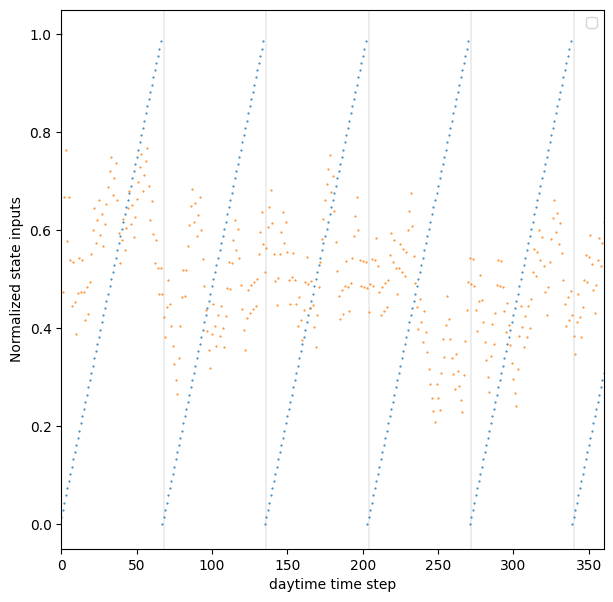

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
State = np.array(State)
for i in range(int(len(R) / env.steps_per_day) + 2):
    ax.axvline(x=env.steps_per_day * i, color="k", linewidth=0.1)
# ax.plot(State[:,:2], '.', markersize=2, label=['time of day','avg area'])
# ax.plot(State[:,2], linewidth=.5, label=[ 'plant motion'])
ax.plot(State[:, :], ".", markersize=1)

ax.set_ylabel("Normalized state inputs")
ax.set_xlabel("daytime time step")
ax.legend()
plt.xlim([0, 72 * 5])
print(State[:20, 1])

max return is 7.604
min return is 0.292


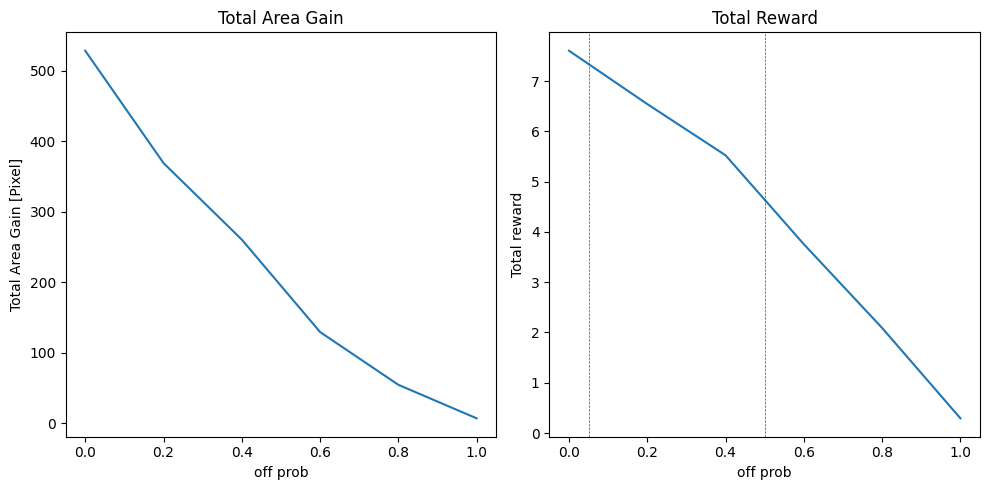

In [5]:
# See if return and total gain in area are positively correlated
num_sample = 6
episodic_return = []
area_gain = []
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for prob in np.linspace(0, 1, num_sample):
    R = []
    A = []

    env.start()
    for _ in range(env.total_data_steps):
        reward, next_state, done, info = env.step(
            np.random.choice([0, 1], p=[prob, 1 - prob])
        )
        A.append(np.mean([pwl(env.all_steps) for pwl in env.actual_areas]))
        R.append(reward)
        if done:
            env.start()

    if prob == 0.5:
        print(f"return for random policy is {np.sum(R):.3f}.")
    episodic_return.append(np.sum(R))
    area_gain.append(A[-1] - A[0])

print(f"max return is {np.max(episodic_return):.3f}")
print(f"min return is {np.min(episodic_return):.3f}")

ax[0].plot(np.linspace(0, 1, num_sample), area_gain)
ax[0].set_title("Total Area Gain")
ax[0].set_xlabel("off prob")
ax[0].set_ylabel("Total Area Gain [Pixel]")

ax[1].plot(np.linspace(0, 1, num_sample), episodic_return)
ax[1].axvline(x=0.1 / 2, color="r", linestyle="--", linewidth=0.5)
ax[1].axvline(x=0.5, color="r", linestyle="--", linewidth=0.5)
ax[1].set_title("Total Reward")
ax[1].set_xlabel("off prob")
ax[1].set_ylabel("Total reward")

fig.tight_layout()